In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load palmerpenguins dataset

Source:
https://github.com/allisonhorst/palmerpenguins

In [11]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
    )

In [7]:
# full_df = pd.read_csv(
#     'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins_raw.csv'
# )

In [ ]:
# penguins = sns.load_dataset("penguins")
# penguins

# Data description and visualization

In [14]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [16]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


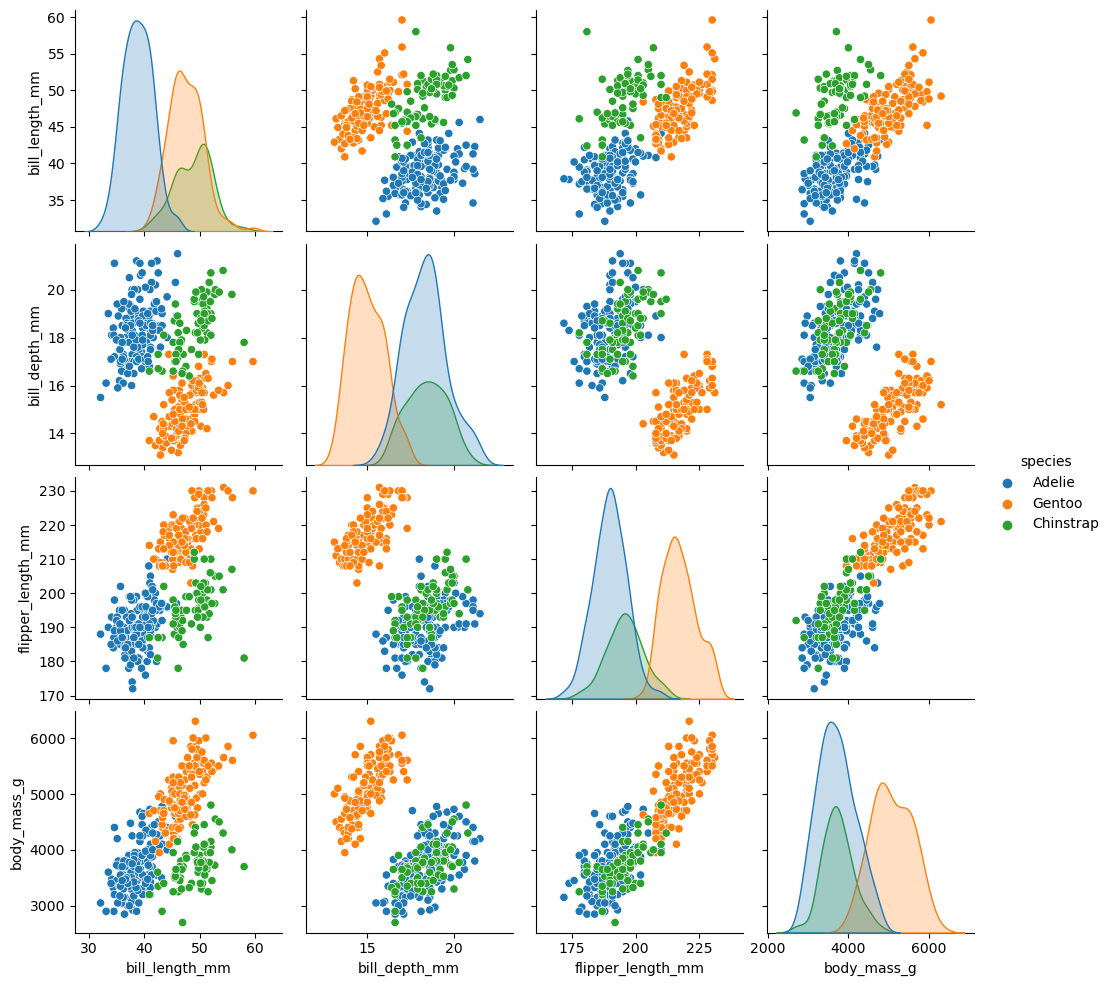

In [54]:
sns.pairplot(df, hue="species", vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

## Null Values

In [28]:
# count how many NaN values are in each column
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [50]:

df_no_na = df.dropna(0, 'any')
df_no_na

/tmp/ipykernel_9260/1290777946.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_no_na = df.dropna(0, 'any')


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [51]:
df_no_na.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## species-sex tuple
Is the combined variable species-sex a good way to differentiate penguins into clear groups? 

In [52]:
df_no_na['species_sex_tuple'] = df_no_na.apply(lambda row: f"{row.species},{row.sex}", axis=1)
df_no_na

/tmp/ipykernel_9260/1676990474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['species_sex_tuple'] = df_no_na.apply(lambda row: f"{row.species},{row.sex}", axis=1)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_sex_tuple
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,"Adelie,male"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,"Adelie,female"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,"Adelie,female"
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,"Adelie,female"
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,"Adelie,male"
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,"Chinstrap,male"
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,"Chinstrap,female"
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,"Chinstrap,male"
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,"Chinstrap,male"


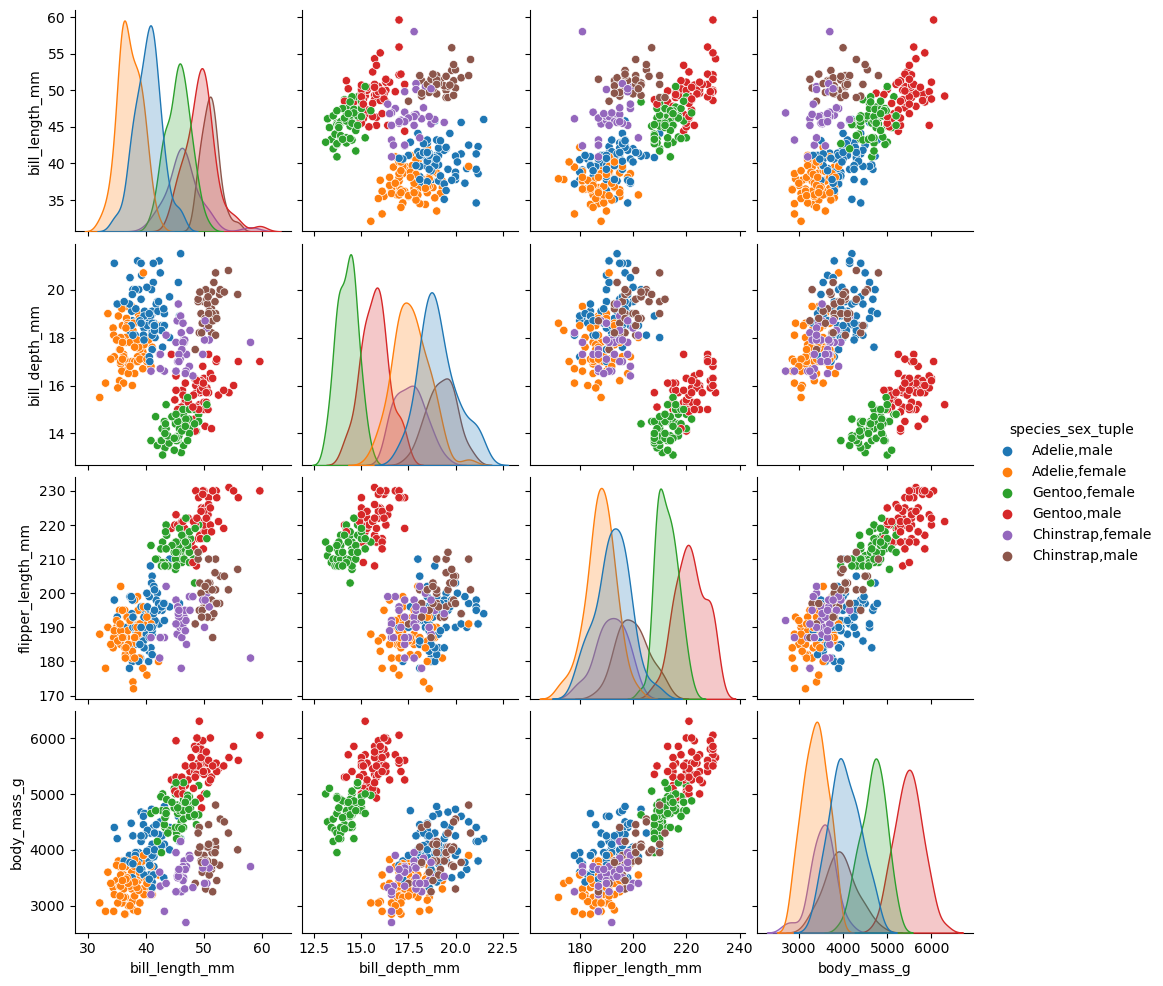

In [55]:
sns.pairplot( df_no_na, hue = 'species_sex_tuple', vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

Observations:
* bill_length_mm is the better parameter to differentiate penguins by species,  
    since it can be combined with other measurements to visualize separated groups.
* Females tend to be clustered close to males of the same species, but with a smaller size/weight.

# Conclusions:
* bill_length_mm brigns valuable information if we want to know the species of a penguin,  
    since we can combine it with other measure and obtain separated groups by species.  
    A combination of two other measurements could be insufficient to differentiate  
    Adelie from Chinstrap. A predictive model will work much better if bill_length_mm  
    is part of the input.
* For all measurements, females tend to be clustered close to males, with a smaller size/weight.
